# 1. DataLoader & parsing

In [84]:
import numpy as np
import pandas as pd

In [85]:
data_path = '../../kaggle_data/creditcard_overdue/open/'
pre_path = '../../kaggle_data/creditcard_overdue/preprocess/'

y_train = pd.read_csv(data_path + 'train.csv')
y_train = y_train['credit']

Raw_train = pd.read_csv(pre_path + 'train_preprocess.csv')
Raw_test = pd.read_csv(pre_path + 'test_preprocess.csv')
submission = pd.read_csv(pre_path + 'sample_submission.csv')

In [86]:
Raw_train.head()

,Unnamed: 0,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,0,0,0,0,0,0,3,1,2,3,1,0,0,0,0,2.0,0
1,1,0,0,1,1,0,0,2,0,1,2,1,0,0,1,1,3.0,0
2,2,1,1,1,0,1,4,3,1,1,6,1,0,1,0,2,2.0,1
3,3,0,0,1,0,0,0,2,1,1,4,1,0,1,0,3,2.0,2
4,4,0,1,1,0,0,2,3,1,1,4,1,0,0,0,2,2.0,1


In [87]:
y_train.head()

0    1.0
1    1.0
2    2.0
3    0.0
4    2.0
Name: credit, dtype: float64

In [88]:
Raw_test.head()

,Unnamed: 0,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,26457,1,1,0,0,0,1,2,0,1,8,0,1,0,1,0,0,2.0,3
1,1,26458,0,0,1,0,0,2,3,1,1,6,1,1,0,1,0,5,2.0,2
2,2,26459,0,0,1,0,0,4,2,1,1,4,1,1,1,1,0,1,2.0,2
3,3,26460,1,1,0,0,0,0,2,1,1,6,1,1,1,0,0,6,2.0,2
4,4,26461,0,1,1,0,0,2,3,1,1,5,1,1,1,0,0,2,2.0,0


# 2. Drop un-use features

In [89]:
X_train = Raw_train.drop(['Unnamed: 0'], axis=1)
X_test = Raw_test.drop(['Unnamed: 0', 'index', 'FLAG_MOBIL'], axis=1)

In [90]:
X_train.shape

(26457, 17)

In [91]:
X_test.shape

(10000, 17)

In [92]:
X_test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,1,0,0,0,1,2,0,1,8,0,0,1,0,0,2.0,3
1,0,0,1,0,0,2,3,1,1,6,1,0,1,0,5,2.0,2
2,0,0,1,0,0,4,2,1,1,4,1,1,1,0,1,2.0,2
3,1,1,0,0,0,0,2,1,1,6,1,1,0,0,6,2.0,2
4,0,1,1,0,0,2,3,1,1,5,1,1,0,0,2,2.0,0


In [93]:
X_train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,0,0,0,0,0,3,1,2,3,1,0,0,0,0,2.0,0
1,0,0,1,1,0,0,2,0,1,2,1,0,0,1,1,3.0,0
2,1,1,1,0,1,4,3,1,1,6,1,0,1,0,2,2.0,1
3,0,0,1,0,0,0,2,1,1,4,1,0,1,0,3,2.0,2
4,0,1,1,0,0,2,3,1,1,4,1,0,0,0,2,2.0,1


# 4. Models & training

In [94]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## 4-1. RandomForest

In [95]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_train.columns

forest = RandomForestClassifier()

forest_param_grid = {"max_depth" : [11, 13, 15],
                    "n_estimators" : [100, 300],
                    "criterion" : ["gini", "entropy"],
                    "random_state" : [42]}

gs_forest = GridSearchCV(forest, forest_param_grid, 
                       cv=k_fold, scoring="accuracy", verbose=1, n_jobs=-1)

gs_forest.fit(X_train, y_train)

forest_best = gs_forest.best_estimator_

print(gs_forest.best_score_)
print(gs_forest.best_params_)

forest_best.fit(X_train, y_train)

importances = forest_best.feature_importances_

y_pred_forest = forest_best.predict(X_train)
predict_forest = forest_best.predict_proba(X_test)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.6585779869603796
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300, 'random_state': 42}


### 4-1-1. Feature importance

 1) occyp_type                     0.14646091252415322
 2) begin_month                    0.1272577461961399
 3) DAYS_BIRTH                     0.12593864076739922
 4) edu_type                       0.061345716567408844
 5) family_type                    0.06080222327750463
 6) income_type                    0.05238869195563755
 7) family_size                    0.05196359074922847
 8) house_type                     0.047740390729536175
 9) car                            0.04503425528059358
10) gender                         0.04287865974701608
11) phone                          0.04254865640017278
12) child_num                      0.04075864613638145
13) income_total                   0.040450835045142686
14) reality                        0.040102334246249725
15) work_phone                     0.038146851895493536
16) email                          0.028280652244659477
17) DAYS_EMPLOYED                  0.007901196237282823


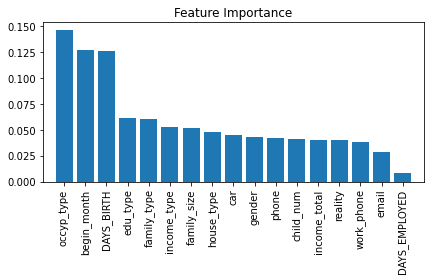

In [96]:
import matplotlib.pyplot as plt

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %s" % (f+1, 30, 
                            feat_labels[indices[f]],
                           importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')

plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 4-2. Logistic-Regression

In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr_param_grid = {"C" : [0.1, 1.0, 100.],
                "solver" : ['sag', 'saga'],
                 "max_iter" : [500],
                "random_state" : [42]}

gs_lr = GridSearchCV(lr, lr_param_grid,
                    cv=k_fold, scoring="accuracy", verbose=1, n_jobs=-1)

gs_lr.fit(X_train, y_train)

lr_best = gs_lr.best_estimator_

print(gs_lr.best_score_)
print(gs_lr.best_params_)

lr_best.fit(X_train, y_train)

y_pred_lr = lr_best.predict(X_train)
predict_lr = lr_best.predict_proba(X_test)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
0.6413047764789596
{'C': 0.1, 'max_iter': 500, 'random_state': 42, 'solver': 'sag'}


## 4-3. KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_param_grid = {"n_neighbors" : [3, 5, 7],
                 "p" : [1, 2],
                 "weights" : ['uniform', 'distance']}

gs_knn = GridSearchCV(knn, knn_param_grid,
                     cv=k_fold, scoring="accuracy", verbose=1, n_jobs=-1)

gs_knn.fit(X_train, y_train)

knn_best = gs_knn.best_estimator_

print(gs_knn.best_score_)
print(gs_knn.best_params_)

knn_best.fit(X_train, y_train)

y_pred_knn = knn_best.predict(X_train)
predict_knn = knn_best.predict_proba(X_test)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.6332165825792615
{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


## 4-4. Ensemble

## 4-4-1. Voting(RandomForest, LogisticRegression, KNN)

In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

kfold = k_fold.split(X_train, y_train)

voting = VotingClassifier(estimators=[('forest', forest_best),
                                     ('knn', knn_best),
                                     ('lr', lr_best)],
                         voting='soft',
                         n_jobs=-1)

scores = cross_val_score(estimator=voting,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1)

print('CV 정확도: {} +/- {}'.format(np.mean(scores), np.std(scores)))

voting = voting.fit(X_train, y_train)

y_pred_vote = voting.predict(X_train)
predict_vote = voting.predict_proba(X_test)

CV 정확도: 0.6621313192363691 +/- 0.004744881417040133


# 5. Evaluating

## 5-1. Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix

### 5-1-1. RandomForest

In [102]:
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred_forest)
print(confmat)

[[  686   131  2405]
 [   51  2080  4136]
 [   40   205 16723]]


### 5-1-2. Logistic-Regression

In [103]:
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred_lr)
print(confmat)

[[    0     0  3222]
 [    0     0  6267]
 [    0     1 16967]]


### 5-1-3. KNN

In [104]:
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred_knn)
print(confmat)

[[ 1037   444  1741]
 [  250  2952  3065]
 [  453  1433 15082]]


### 5-1-4. Voting

In [105]:
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred_vote)
print(confmat)

[[  327   157  2738]
 [   36  1541  4690]
 [   19   199 16750]]


## 5-2. Accuracy Score

In [106]:
from sklearn.metrics import accuracy_score

### 5-2-1. RandomForest

In [107]:
score = accuracy_score(y_train, y_pred_forest)
print(score)

0.7366292474581396


### 5-2-2. Logistic Regression

In [108]:
score = accuracy_score(y_train, y_pred_lr)
print(score)

0.6413047586650036


### 5-2-3. KNN

In [109]:
score = accuracy_score(y_train, y_pred_knn)
print(score)

0.7208300260800544


### 5-2-4. Voting

In [110]:
score = accuracy_score(y_train, y_pred_vote)
print(score)

0.7037079033904071


# 6. Submission file

In [116]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [122]:
predict = pd.DataFrame(predict_forest)

predict.columns = ['0', '1', '2']

predict

Index(['index', '0', '1', '2'], dtype='object')


,0,1,2
0,0.073189,0.146404,0.780407
1,0.137292,0.154376,0.708332
2,0.149257,0.170363,0.680381
3,0.119515,0.120627,0.759859
4,0.097286,0.424179,0.478535
...,...,...,...
9995,0.182951,0.166406,0.650643
9996,0.274618,0.193974,0.531408
9997,0.056551,0.142833,0.800615
9998,0.144012,0.251638,0.604350


In [126]:
submission['0'] = predict['0']
submission['1'] = predict['1']
submission['2'] = predict['2']

submission

,index,0,1,2
0,26457,0.073189,0.146404,0.780407
1,26458,0.137292,0.154376,0.708332
2,26459,0.149257,0.170363,0.680381
3,26460,0.119515,0.120627,0.759859
4,26461,0.097286,0.424179,0.478535
...,...,...,...,...
9995,36452,0.182951,0.166406,0.650643
9996,36453,0.274618,0.193974,0.531408
9997,36454,0.056551,0.142833,0.800615
9998,36455,0.144012,0.251638,0.604350


In [127]:
submission.to_csv('submit.csv', header=True, index=False)